In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

# Suggestions from reviews
SUGGESTION:
Applying color threshold to the B(range:145-200 in LAB for shading & brightness changes and R in RGB in final pipeline can also help in detecting the yellow lanes.
And thresholding L (range: 215-255) of Luv for whites.

## Here is the original code

./test_images\straight_lines1.jpg
./test_images\straight_lines2.jpg
./test_images\test1.jpg
./test_images\test2.jpg
./test_images\test3.jpg
./test_images\test4.jpg
./test_images\test5.jpg
./test_images\test6.jpg


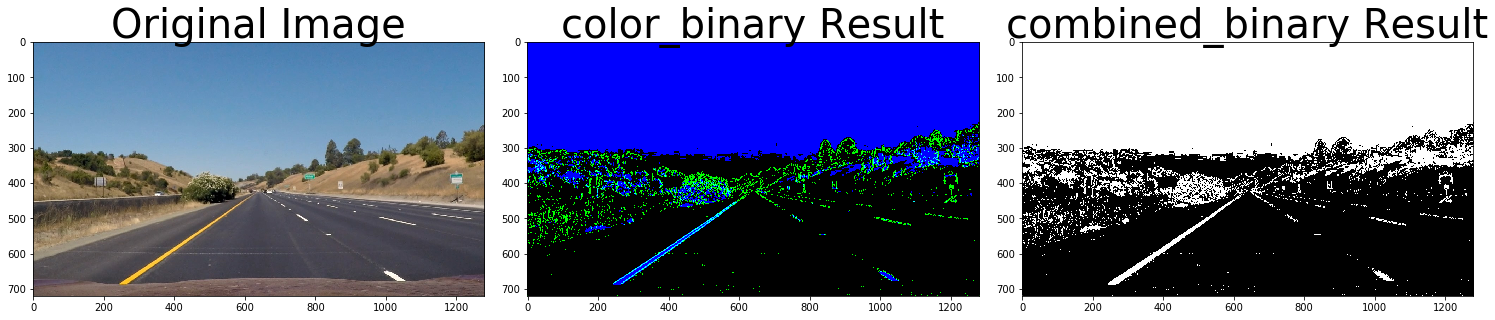

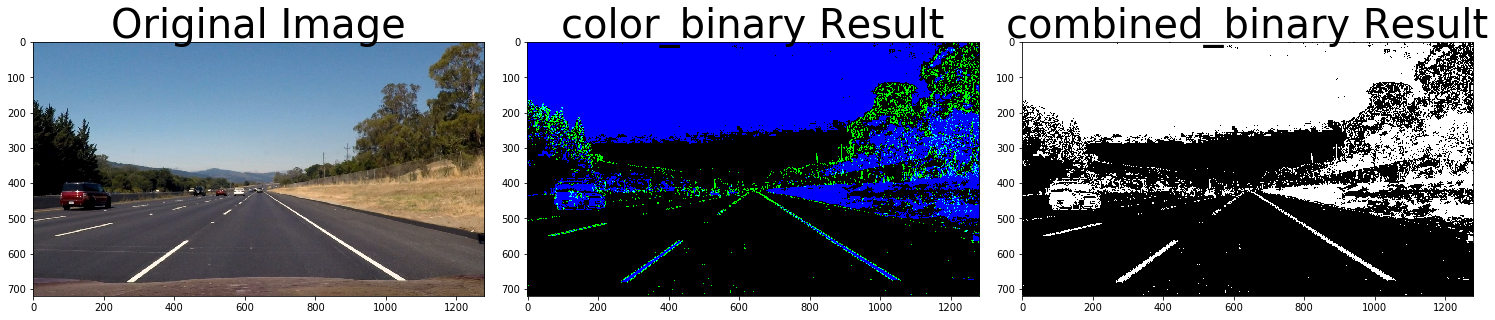

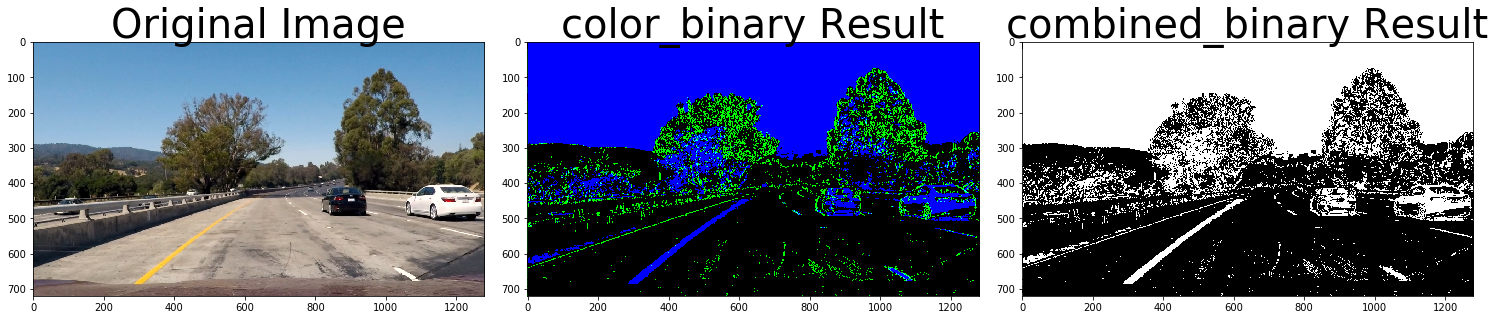

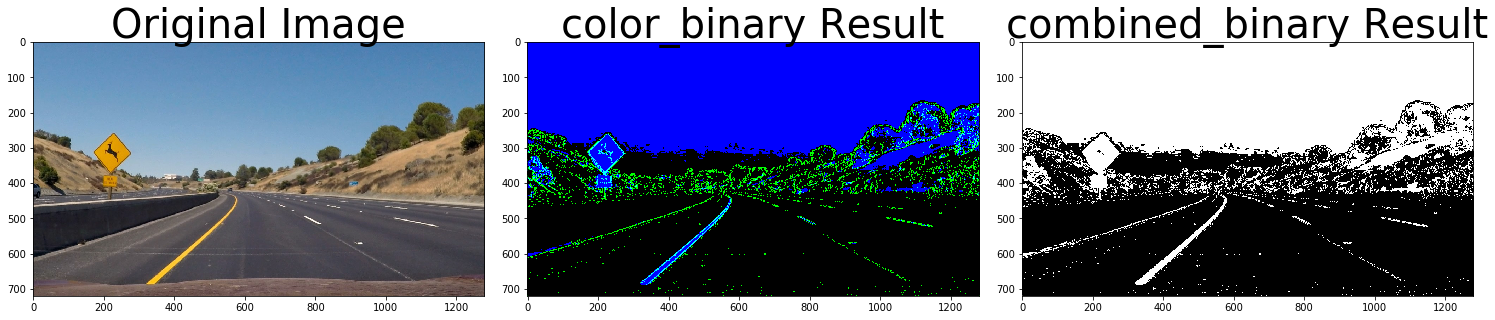

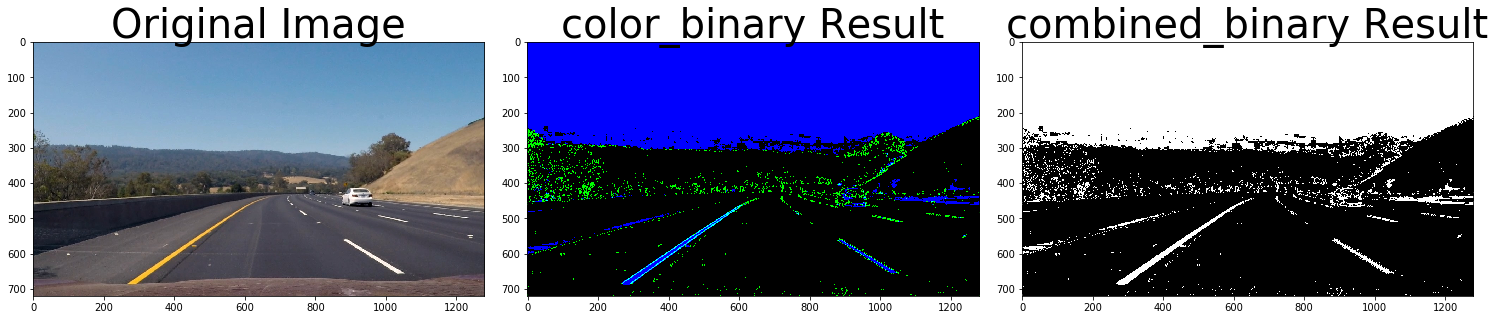

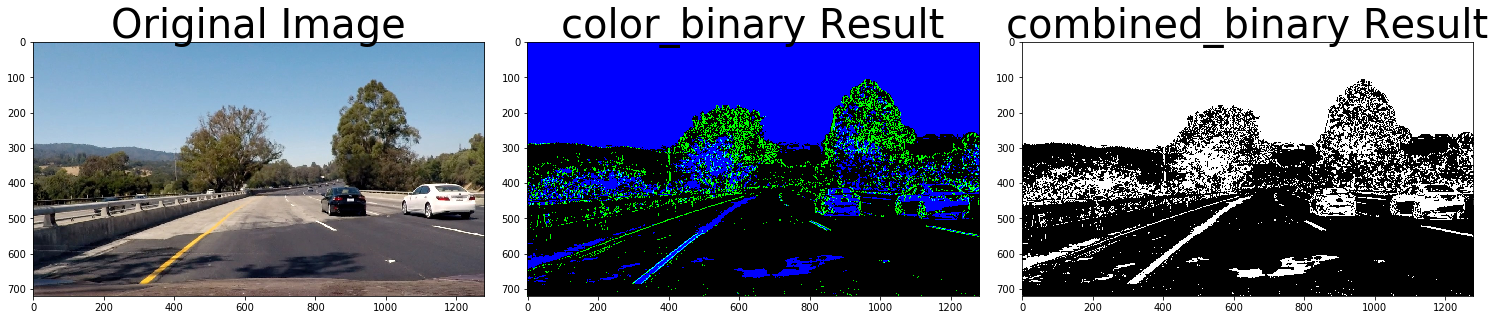

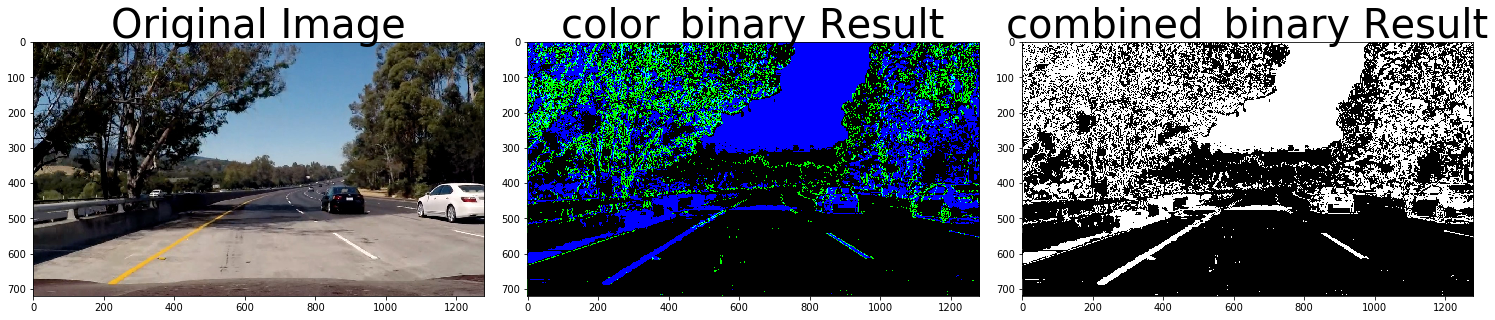

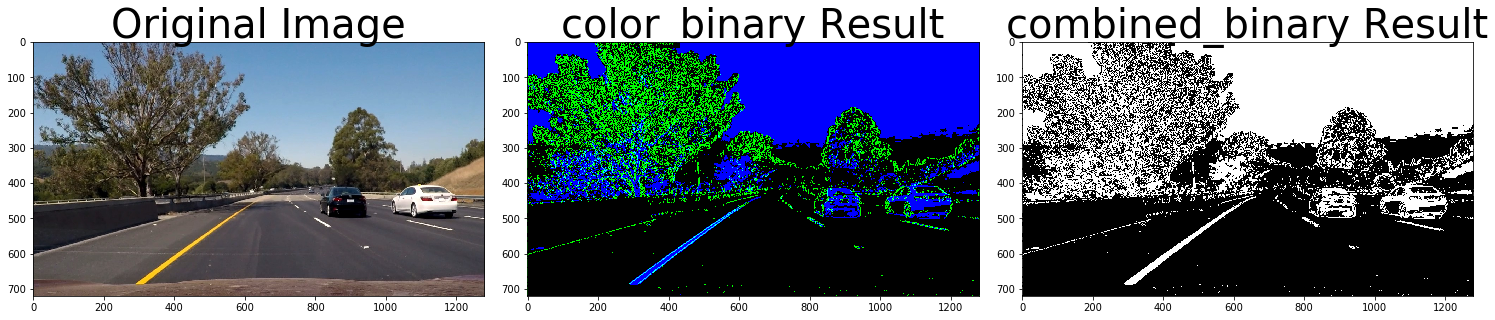

In [2]:

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return color_binary, combined_binary




# color_binary, combined_binary = pipeline(image, s_thresh=(90, 255), sx_thresh=(20, 100))


for name in glob.glob('./test_images/*'):
    print (name)
    # Read an image
    image = mpimg.imread(name)

    color_binary, combined_binary = pipeline(image, s_thresh=(90, 255), sx_thresh=(20, 100))
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 9))
    f.tight_layout()

    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=40)

    ax2.imshow(color_binary)
    ax2.set_title('color_binary Result', fontsize=40)

    ax3.imshow(combined_binary, cmap='gray')
    ax3.set_title('combined_binary Result', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


# cv2.imwrite("output_images/combined_S_gradient.jpg", combined_binary * 255)


## Here is the improved code accoring to the suggestions

./test_images\straight_lines1.jpg
./test_images\straight_lines2.jpg
./test_images\test1.jpg
./test_images\test2.jpg
./test_images\test3.jpg
./test_images\test4.jpg
./test_images\test5.jpg
./test_images\test6.jpg


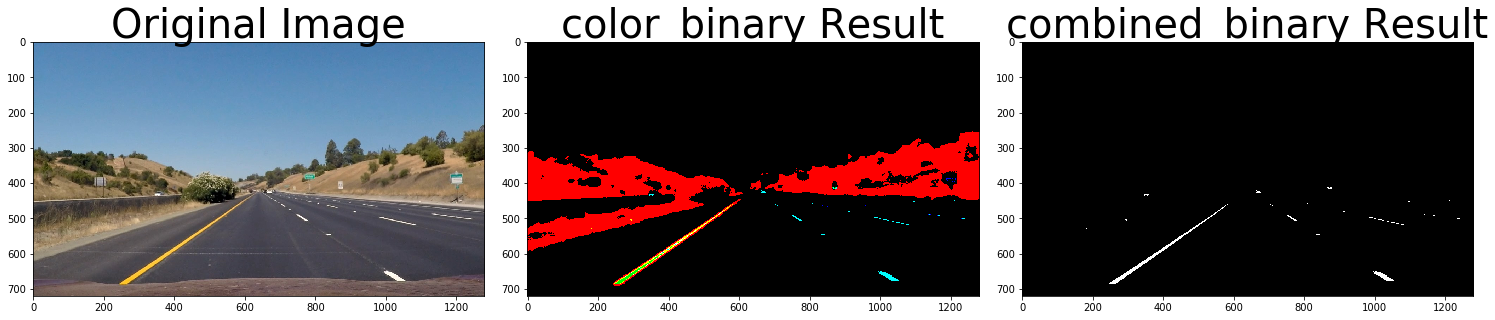

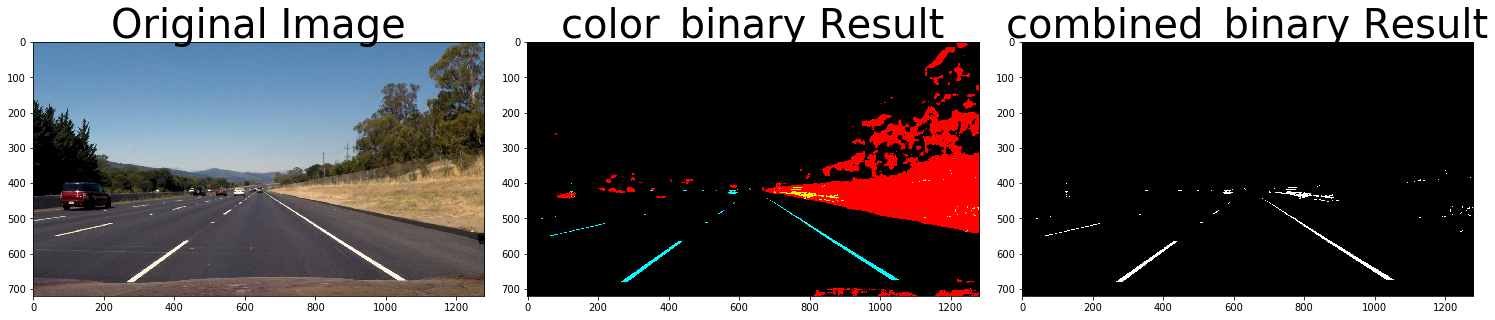

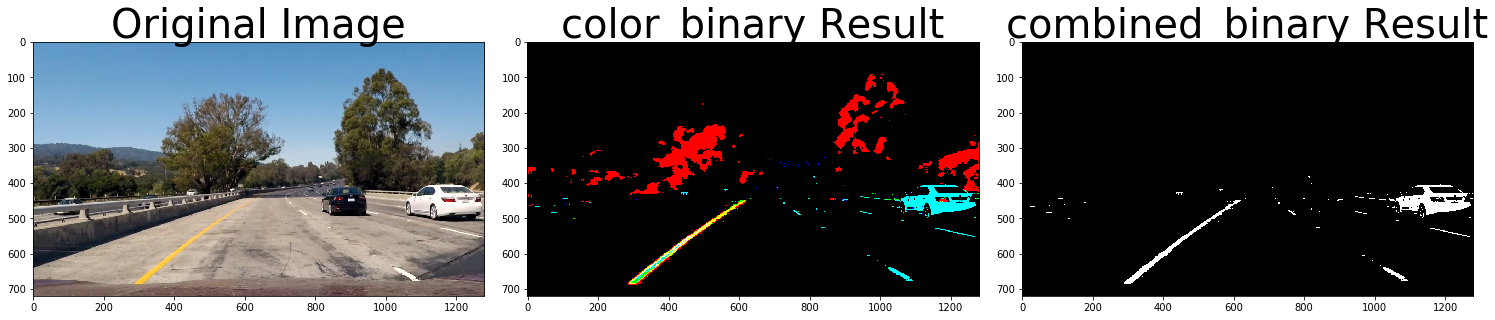

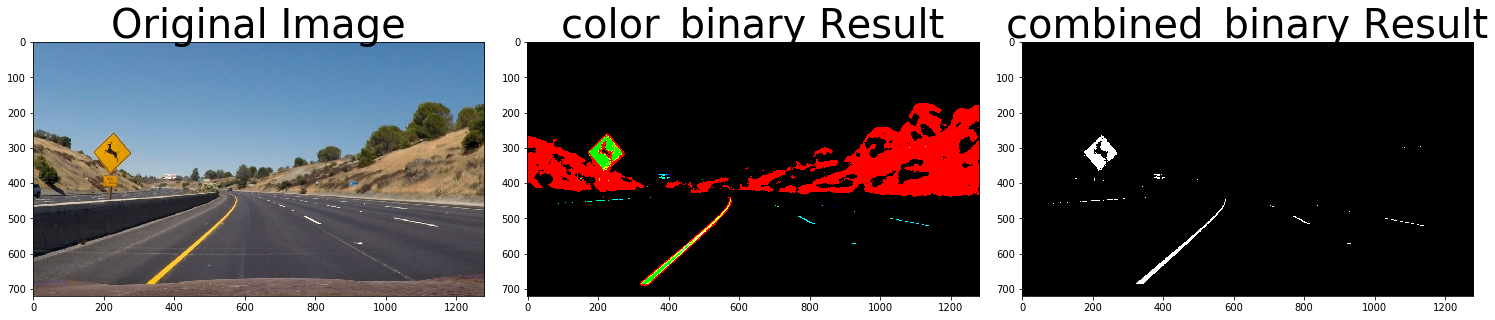

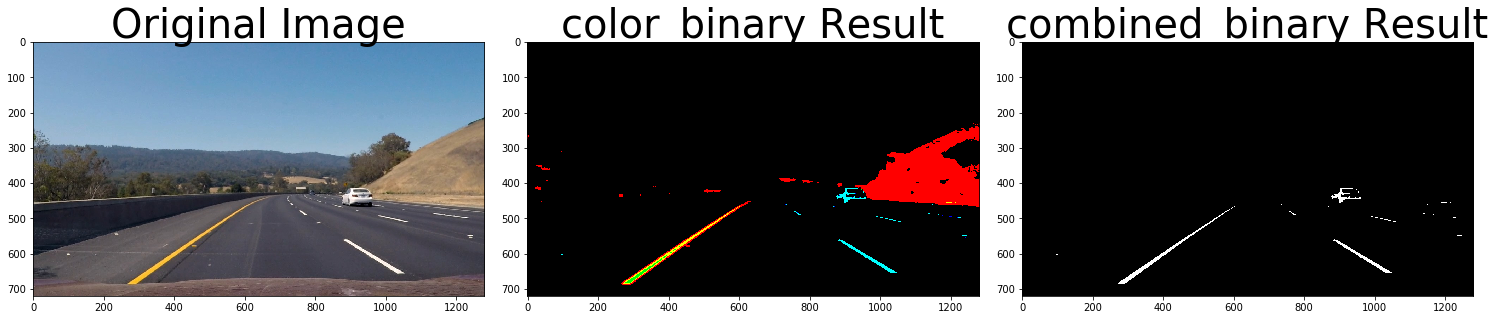

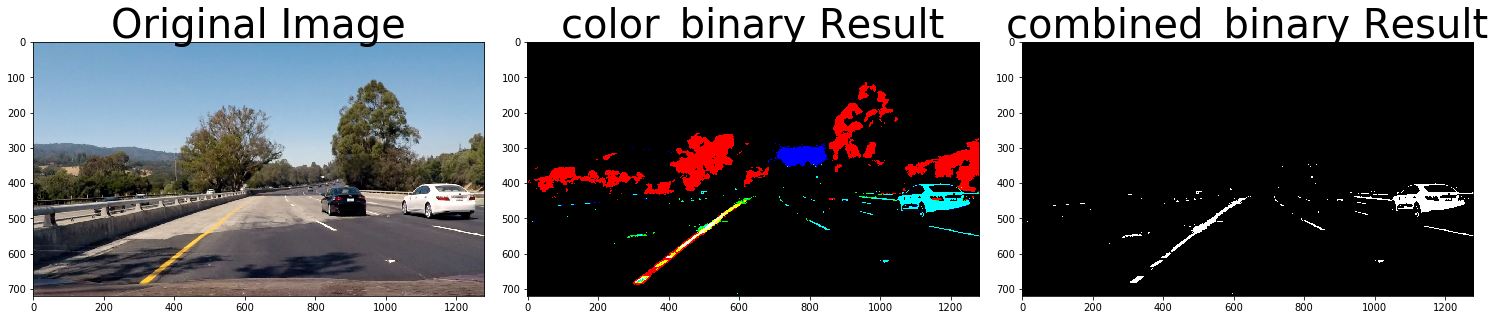

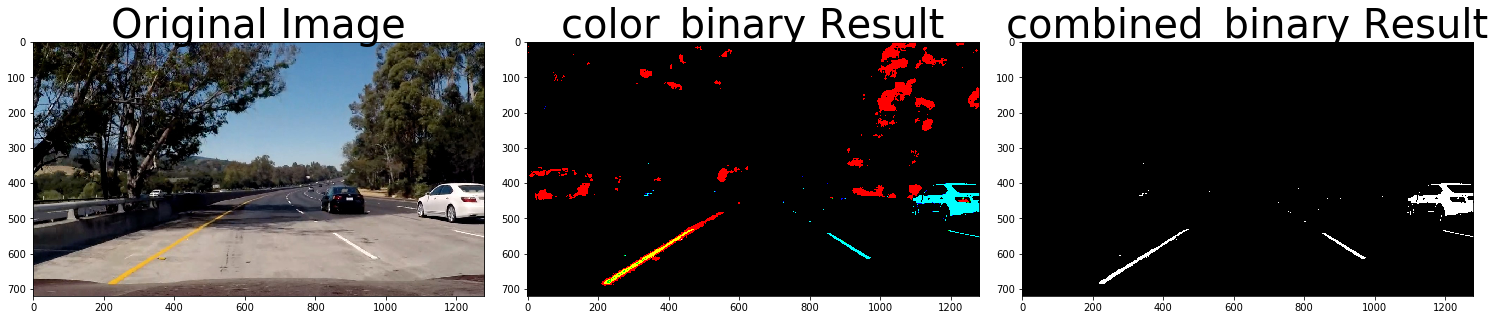

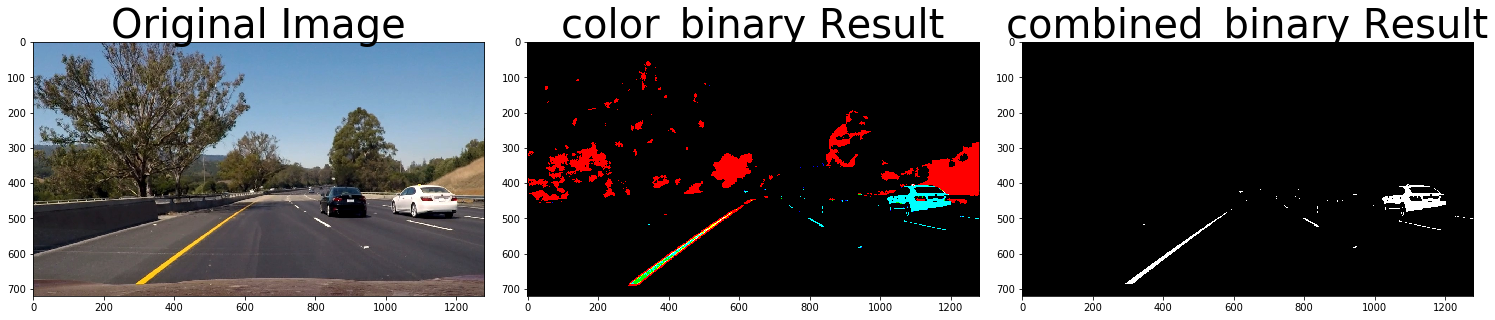

In [3]:

# Edit this function to create your own pipeline.
def pipeline(img, lab_b_thresh=(145, 200), rgb_r_thresh=(100, 255), luv_l_thresh=(215, 255), s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    luv = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    lab_b = lab[:,:,2]
    rgb_r = img[:,:,0]
    luv_l = luv[:,:,0]
    
    # Threshold: B in LAB
    lab_b_binary = np.zeros_like(lab_b)
    lab_b_binary[(lab_b >= lab_b_thresh[0]) & (lab_b <= lab_b_thresh[1])] = 1
    
    # Threshold: R in RGB
    rgb_r_binary = np.zeros_like(rgb_r)
    rgb_r_binary[(rgb_r >= rgb_r_thresh[0]) & (rgb_r <= rgb_r_thresh[1])] = 1
    
    # Threshold: L in LUV
    luv_l_binary = np.zeros_like(luv_l)
    luv_l_binary[(luv_l >= luv_l_thresh[0]) & (luv_l <= luv_l_thresh[1])] = 1
    
    # Threshold: S in HLS
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Threshold: l in HLS
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

    
    # Stack each channel
    color_binary = np.dstack(( lab_b_binary, rgb_r_binary, luv_l_binary)) * 255
    combined_binary = np.zeros_like(lab_b_binary)
    combined_binary[(lab_b_binary == 1) & (rgb_r_binary == 1) | (luv_l_binary == 1) | (s_binary == 1) | (sxbinary == 1)] = 1
    return color_binary, rgb_r_binary




# Plot the result


for name in glob.glob('./test_images/*'):
    print (name)
    # Read an image
    image = mpimg.imread(name)

    color_binary, combined_binary = pipeline(image, lab_b_thresh=(145, 200), rgb_r_thresh=(220, 255), luv_l_thresh=(215, 255), s_thresh=(90, 255), sx_thresh=(20, 100))
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 9))
    f.tight_layout()

    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=40)

    ax2.imshow(color_binary)
    ax2.set_title('color_binary Result', fontsize=40)

    ax3.imshow(combined_binary, cmap='gray')
    ax3.set_title('combined_binary Result', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


# cv2.imwrite("output_images/combined_S_gradient.jpg", combined_binary * 255)


## Change into bird-eye-view

In [5]:

def search_around_poly(binary_warped, left_fit, right_fit):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720  # meters per pixel in y dimension
    xm_per_pix = 3.7/700  # meters per pixel in x dimension

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy +
                                   left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) +
                                                                         left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy +
                                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) +
                                                                           right_fit[1]*nonzeroy + right_fit[2] + margin)))

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fit, right_fit, left_fitx, right_fitx, ploty = fit_poly(
        binary_warped.shape, leftx, lefty, rightx, righty)
    # Fit new polynomials (in the real world)
    left_fit_cr, right_fit_cr, left_fitx_cr, right_fitx_cr, ploty_cr = fit_poly(
        binary_warped.shape, leftx * xm_per_pix, lefty * ym_per_pix, rightx * xm_per_pix, righty * ym_per_pix)

    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)

    # Calculation of R_curve (radius of curvature)
    left_curverad = (
                    (1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = (
        (1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    # Calculation of R_curve (radius of curvature in the real world)
    left_curverad_real = (
        (1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad_real = (
        (1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array(
        [np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin,
                                                                    ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array(
        [np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin,
                                                                     ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0, 255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0, 255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##

    return result, left_curverad, right_curverad, left_curverad_real, right_curverad_real, left_fit, right_fit


def warp(img):
    img_size = (img.shape[1], img.shape[0])

    # Four source coordinate
    src = np.float32([[593, 450], [690, 450], [200, 720], [1120, 720]])

    # Four desired coordinates
    dst = np.float32([[200, 0],	[1000, 0], [200, 720], [1000, 720]])

    # Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(src, dst)

    # Could compute the inverse also by swapping the input parameters
    Minv = cv2.getPerspectiveTransform(dst, src)

    # Create warped image - use linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped, M, Minv

def calibration_params_cal():
    '''
    用'camera_cal'中的图片，校准相机，得到校准相机用的坐标点
    '''
    # Read in adn make a list of calibration images
    images = glob.glob('./camera_cal/calibration*.jpg')

    # Arrays to store object points and image points from all the images
    objpoints = []
    imgpoints = []

    # Prepare object points
    objp = np.zeros((6*9, 3), np.float32)
    objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

    for fname in images:
        # Read in each image
        img = mpimg.imread(fname)

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

        # If corners are found, add object points, image points
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, img.shape[1:], None, None)

    return ret, mtx, dist, rvecs, tvecs


def undistort_image(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


def process_image(image):

    # Step 1: Undistort each frame
    img = undistort_image(image, mtx, dist)

    # Step 2: Convert each frame into a binary image, which can display lane lines clearly,
    # using the HLS and gradient threshold together

    color_binary, thresholded_binary = pipeline(image, lab_b_thresh=(145, 200), luv_l_thresh=(215, 255))

    # Step 3: Convert the image into a top-down view for calculate the curve and fitpoly
    warped_thresholded_binary, M, Minv = warp(thresholded_binary)

    # Step 4: Find the lane lines
    # out_img, left_fit.current_fit, right_fit.current_fit = fit_polynomial(warped_thresholded_binary)
    result, left_curverad, right_curverad, left_curverad_real, right_curverad_real, left_fit.current_fit, right_fit.current_fit = search_around_poly(
        warped_thresholded_binary, left_fit=left_fit.current_fit, right_fit=right_fit.current_fit)

    left_fit.radius_of_curvature = left_curverad_real
    right_fit.radius_of_curvature = right_curverad_real

    # Step 5: Display the lane lines on the image
    yMax = img.shape[0]
    ploty = np.linspace(0, yMax - 1, yMax)
    color_warp = np.zeros_like(img).astype(np.uint8)

    # Step 5.1: Calculate points.
    left_fitx = left_fit.current_fit[0]*ploty**2 + \
        left_fit.current_fit[1]*ploty + left_fit.current_fit[2]
    right_fitx = right_fit.current_fit[0]*ploty**2 + \
        right_fit.current_fit[1]*ploty + right_fit.current_fit[2]

    # Step 5.2: Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array(
        [np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Step 5.3: Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0, 255, 0))

    # Step 5.4: Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(
        color_warp, Minv, (img.shape[1], img.shape[0]))
    result = cv2.addWeighted(img, 1, newwarp, 0.3, 0)

    # Step 6: Display the lane lines info on the image
    left_curve_base = left_fit.current_fit[0] * image.shape[0] ** 2 + \
        left_fit.current_fit[1] * image.shape[0] + left_fit.current_fit[2]
    right_curve_base = right_fit.current_fit[0] * image.shape[0] ** 2 + \
        right_fit.current_fit[1] * \
        image.shape[0] + right_fit.current_fit[2]
    car_offset = ((left_curve_base + right_curve_base) /
                  2 - image.shape[1] / 2) * xm_per_pix
    text1 = "Curvature radius (left, right) = (" + str(
        left_fit.radius_of_curvature) + "m, " + str(right_fit.radius_of_curvature) + "m)"
    text2 = "Car offset = " + str(car_offset) + "m"
    cv2.putText(result, text1, (40, 50),
                cv2.FONT_HERSHEY_PLAIN, 2.0, (0, 0, 255), 2)
    cv2.putText(result, text2, (40, 100),
                cv2.FONT_HERSHEY_PLAIN, 2.0, (0, 0, 255), 2)

    # Step 7: Return the processed image
    return result

# Step 1: Calibrate the camera, get the calibration params
ret, mtx, dist, rvecs, tvecs = calibration_params_cal()

for name in glob.glob('./test_images/*'):
    print (name)
    # Read an image
    image = mpimg.imread(name)
    result = process_image(image)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=40)

    ax2.imshow(result)
    ax2.set_title('Result Image', fontsize=40)

    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


./test_images\straight_lines1.jpg


NameError: name 'search_around_poly' is not defined